In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

# Set plot style
plt.style.use('seaborn-v0_8')
sns.set_palette('husl')
%matplotlib inline

print('='*70)
print('CHICAGO CRIME DATA EXPLORATION')
print('Team: Kiran, Neethu, Sajitha')
print('='*70)
print('\n✓ Libraries imported successfully')

CHICAGO CRIME DATA EXPLORATION
Team: Kiran, Neethu, Sajitha

✓ Libraries imported successfully


In [2]:
DATA_PATH = '../data/raw/chicago_crimes_2001_present.csv'
SAMPLE_SIZE = 100000

print(f'Loading {SAMPLE_SIZE:,} rows from Chicago crime dataset...')
df = pd.read_csv(DATA_PATH, nrows=SAMPLE_SIZE)

print(f'✓ Successfully loaded {len(df):,} rows and {len(df.columns)} columns')
print(f'Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB')
print(f'\nDataset shape: {df.shape}')

# Display first rows
df.head()

Loading 100,000 rows from Chicago crime dataset...
✓ Successfully loaded 100,000 rows and 22 columns
Memory usage: 67.98 MB

Dataset shape: (100000, 22)


,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,13311263,JG503434,07/29/2022 03:39:00 AM,023XX S TROY ST,1582,OFFENSE INVOLVING CHILDREN,CHILD PORNOGRAPHY,RESIDENCE,True,False,...,25.0,30.0,17,NaN,NaN,2022,04/18/2024 03:40:59 PM,NaN,NaN,NaN
1,13053066,JG103252,01/03/2023 04:44:00 PM,039XX W WASHINGTON BLVD,2017,NARCOTICS,MANUFACTURE / DELIVER - CRACK,SIDEWALK,True,False,...,28.0,26.0,18,NaN,NaN,2023,01/20/2024 03:41:12 PM,NaN,NaN,NaN
2,12131221,JD327000,08/10/2020 09:45:00 AM,015XX N DAMEN AVE,0326,ROBBERY,AGGRAVATED VEHICULAR HIJACKING,STREET,True,False,...,1.0,24.0,03,1162795.0,1909900.0,2020,05/17/2025 03:40:52 PM,41.908418,-87.677407,"(41.908417822, -87.67740693)"
3,11227634,JB147599,08/26/2017 10:00:00 AM,001XX W RANDOLPH ST,0281,CRIM SEXUAL ASSAULT,NON-AGGRAVATED,HOTEL/MOTEL,False,False,...,42.0,32.0,02,NaN,NaN,2017,02/11/2018 03:57:41 PM,NaN,NaN,NaN
4,13203321,JG415333,09/06/2023 05:00:00 PM,002XX N Wells st,1320,CRIMINAL DAMAGE,TO VEHICLE,PARKING LOT / GARAGE (NON RESIDENTIAL),False,False,...,42.0,32.0,14,1174694.0,1901831.0,2023,11/04/2023 03:40:18 PM,41.886018,-87.633938,"(41.886018055, -87.633937881)"


In [3]:
# Parse date and create temporal features
print("Creating temporal features...")

df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['Hour'] = df['Date'].dt.hour
df['DayOfWeek'] = df['Date'].dt.dayofweek
df['DayName'] = df['Date'].dt.day_name()

print(f"\n✓ Temporal features created")
print(f"Date Range: {df['Date'].min()} to {df['Date'].max()}")
print(f"Total Days: {(df['Date'].max() - df['Date'].min()).days:,}")
print(f"Years: {df['Year'].min()} to {df['Year'].max()}")

Creating temporal features...

✓ Temporal features created
Date Range: 2001-01-01 00:00:00 to 2025-03-31 12:30:00
Total Days: 8,855
Years: 2001 to 2025


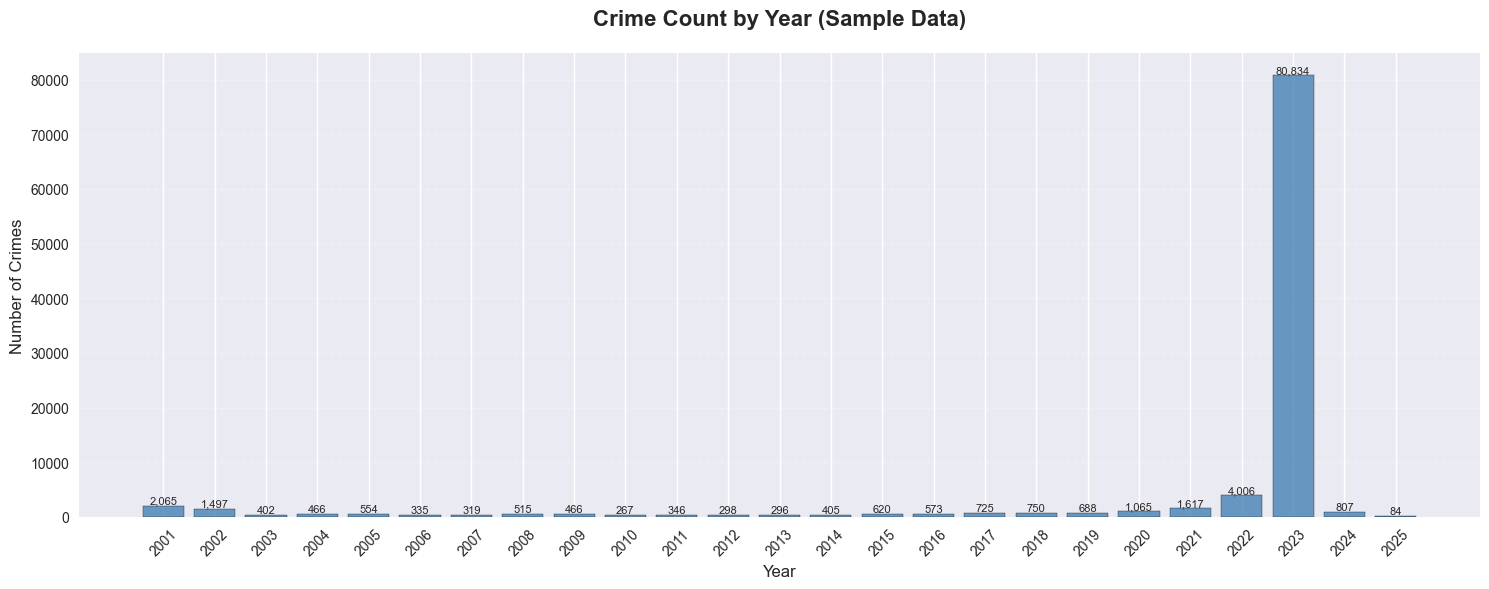


📊 Crimes by Year:
  2001: 2,065
  2002: 1,497
  2003: 402
  2004: 466
  2005: 554
  2006: 335
  2007: 319
  2008: 515
  2009: 466
  2010: 267
  2011: 346
  2012: 298
  2013: 296
  2014: 405
  2015: 620
  2016: 573
  2017: 725
  2018: 750
  2019: 688
  2020: 1,065
  2021: 1,617
  2022: 4,006
  2023: 80,834
  2024: 807
  2025: 84


In [4]:
# Visualize crimes by year
plt.figure(figsize=(15, 6))

year_counts = df['Year'].value_counts().sort_index()
plt.bar(year_counts.index, year_counts.values, color='steelblue', alpha=0.8, edgecolor='black')

plt.title('Crime Count by Year (Sample Data)', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Crimes', fontsize=12)
plt.xticks(year_counts.index, rotation=45)
plt.grid(axis='y', alpha=0.3, linestyle='--')

# Add value labels on bars
for year, count in year_counts.items():
    plt.text(year, count, f'{count:,}', ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

print("\n📊 Crimes by Year:")
for year, count in year_counts.items():
    print(f"  {year}: {count:,}")

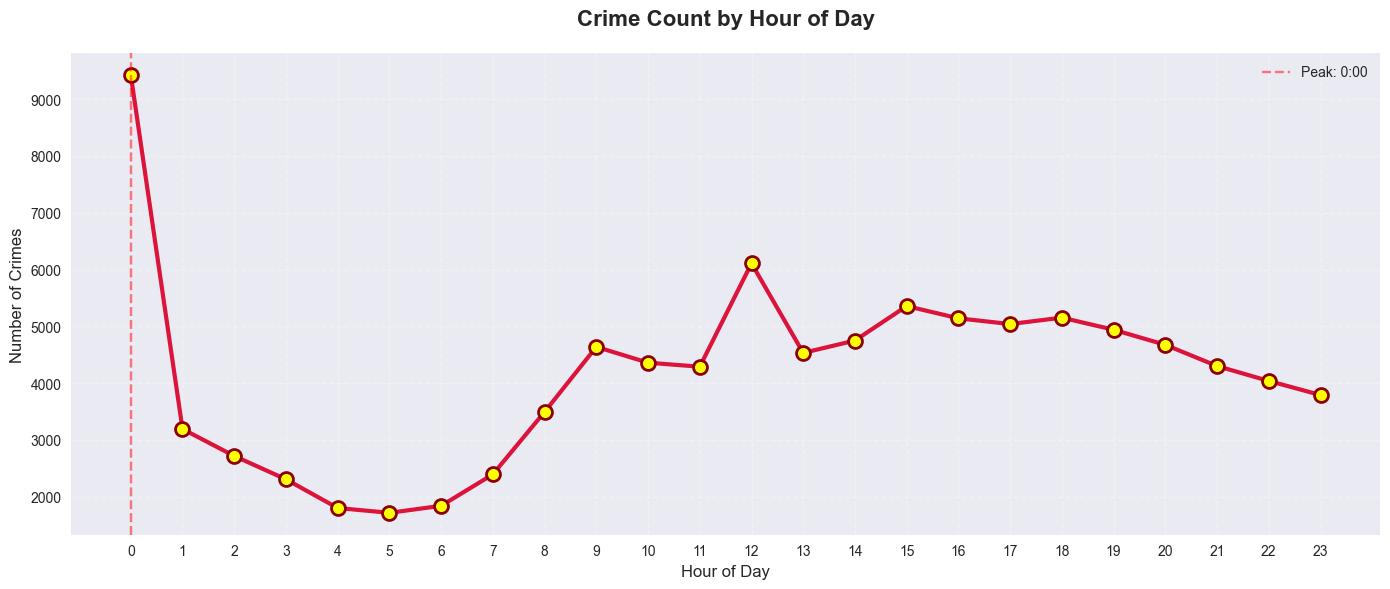


📊 HOURLY PATTERNS:
  Peak crime hour: 0:00 (9,429 crimes)
  Lowest crime hour: 5:00 (1,716 crimes)


In [5]:
# Crime patterns by hour
plt.figure(figsize=(14, 6))

hourly = df['Hour'].value_counts().sort_index()
plt.plot(hourly.index, hourly.values, marker='o', linewidth=3, 
         markersize=10, color='crimson', markerfacecolor='yellow', 
         markeredgecolor='darkred', markeredgewidth=2)

plt.title('Crime Count by Hour of Day', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Hour of Day', fontsize=12)
plt.ylabel('Number of Crimes', fontsize=12)
plt.xticks(range(0, 24))
plt.grid(True, alpha=0.3, linestyle='--')

# Highlight peak hours
peak_hour = hourly.idxmax()
plt.axvline(peak_hour, color='red', linestyle='--', alpha=0.5, label=f'Peak: {peak_hour}:00')
plt.legend()

plt.tight_layout()
plt.show()

print(f"\n📊 HOURLY PATTERNS:")
print(f"  Peak crime hour: {hourly.idxmax()}:00 ({hourly.max():,} crimes)")
print(f"  Lowest crime hour: {hourly.idxmin()}:00 ({hourly.min():,} crimes)")

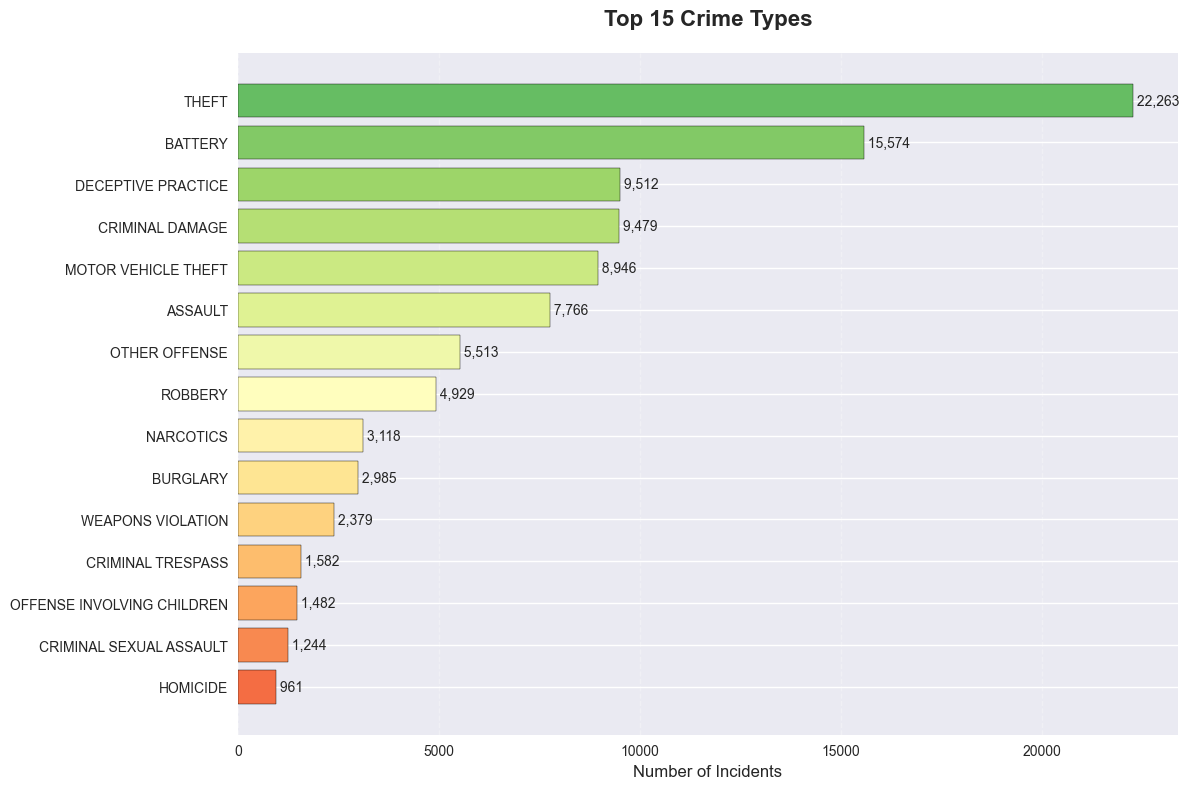


🚨 Top 15 Crime Types:
 1. THEFT                         : 22,263 (22.26%)
 2. BATTERY                       : 15,574 (15.57%)
 3. DECEPTIVE PRACTICE            :  9,512 ( 9.51%)
 4. CRIMINAL DAMAGE               :  9,479 ( 9.48%)
 5. MOTOR VEHICLE THEFT           :  8,946 ( 8.95%)
 6. ASSAULT                       :  7,766 ( 7.77%)
 7. OTHER OFFENSE                 :  5,513 ( 5.51%)
 8. ROBBERY                       :  4,929 ( 4.93%)
 9. NARCOTICS                     :  3,118 ( 3.12%)
10. BURGLARY                      :  2,985 ( 2.99%)
11. WEAPONS VIOLATION             :  2,379 ( 2.38%)
12. CRIMINAL TRESPASS             :  1,582 ( 1.58%)
13. OFFENSE INVOLVING CHILDREN    :  1,482 ( 1.48%)
14. CRIMINAL SEXUAL ASSAULT       :  1,244 ( 1.24%)
15. HOMICIDE                      :    961 ( 0.96%)


In [6]:
# Top 15 crime types
top_crimes = df['Primary Type'].value_counts().head(15)

plt.figure(figsize=(12, 8))
colors = plt.cm.RdYlGn_r(np.linspace(0.2, 0.8, len(top_crimes)))
bars = plt.barh(range(len(top_crimes)), top_crimes.values, color=colors, edgecolor='black')

plt.yticks(range(len(top_crimes)), top_crimes.index)
plt.xlabel('Number of Incidents', fontsize=12)
plt.title('Top 15 Crime Types', fontsize=16, fontweight='bold', pad=20)
plt.gca().invert_yaxis()
plt.grid(axis='x', alpha=0.3, linestyle='--')

# Add value labels
for i, (crime, count) in enumerate(top_crimes.items()):
    plt.text(count, i, f' {count:,}', va='center', fontsize=10)

plt.tight_layout()
plt.show()

print("\n🚨 Top 15 Crime Types:")
for i, (crime, count) in enumerate(top_crimes.items(), 1):
    pct = count / len(df) * 100
    print(f"{i:2d}. {crime:30s}: {count:6,} ({pct:5.2f}%)")

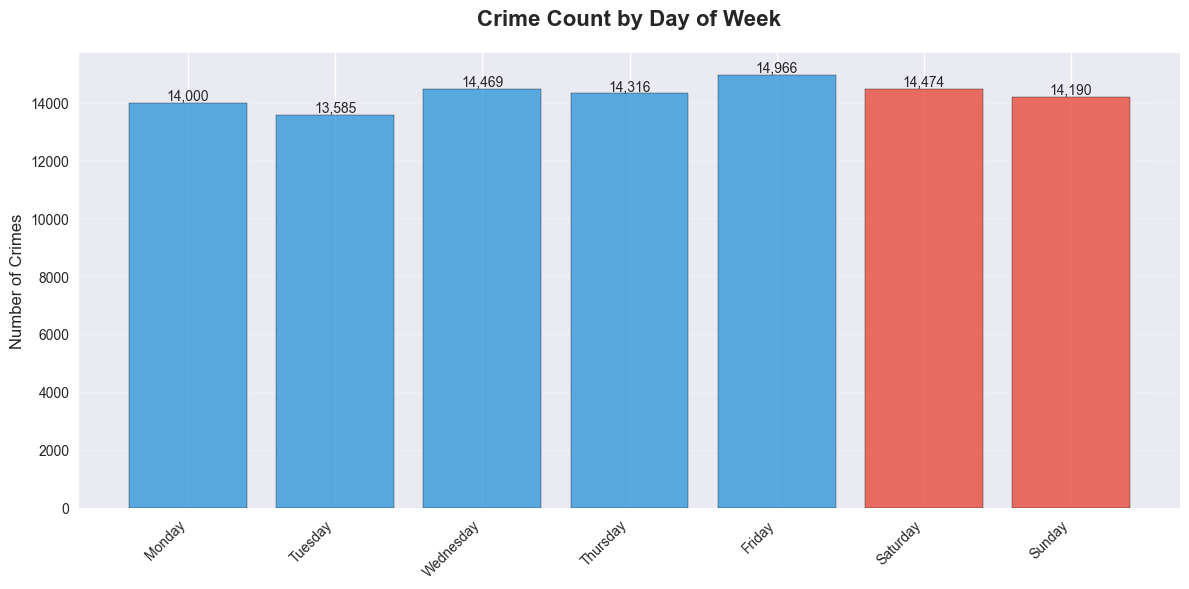


📅 Crime frequency by day:
  Monday    : 14,000 (14.00%)
  Tuesday   : 13,585 (13.58%)
  Wednesday : 14,469 (14.47%)
  Thursday  : 14,316 (14.32%)
  Friday    : 14,966 (14.97%)
  Saturday  : 14,474 (14.47%)
  Sunday    : 14,190 (14.19%)


In [7]:
# Crime by day of week
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_counts = df['DayOfWeek'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
colors = ['#3498db' if i < 5 else '#e74c3c' for i in range(7)]
bars = plt.bar(range(7), day_counts.values, color=colors, alpha=0.8, edgecolor='black')

plt.xticks(range(7), days, rotation=45, ha='right')
plt.title('Crime Count by Day of Week', fontsize=16, fontweight='bold', pad=20)
plt.ylabel('Number of Crimes', fontsize=12)
plt.grid(axis='y', alpha=0.3, linestyle='--')

# Add value labels
for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height):,}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

print("\n📅 Crime frequency by day:")
for i, day in enumerate(days):
    print(f"  {day:10s}: {day_counts[i]:,} ({day_counts[i]/len(df)*100:.2f}%)")

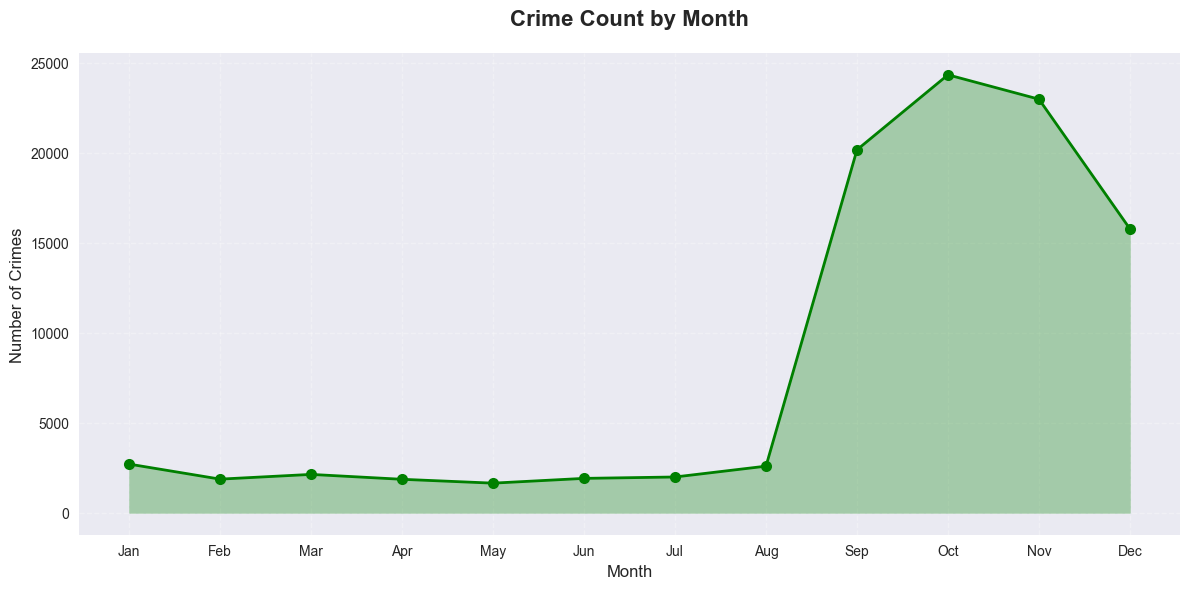


📆 Seasonal Patterns:
  Highest month: Oct (24,340 crimes)
  Lowest month: May (1,649 crimes)


In [8]:
# Crime by month
plt.figure(figsize=(12, 6))

monthly = df['Month'].value_counts().sort_index()
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
          'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

plt.plot(monthly.index, monthly.values, marker='o', linewidth=2, 
         markersize=8, color='green')
plt.fill_between(monthly.index, monthly.values, alpha=0.3, color='green')

plt.xticks(range(1, 13), months)
plt.title('Crime Count by Month', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Crimes', fontsize=12)
plt.grid(True, alpha=0.3, linestyle='--')

plt.tight_layout()
plt.show()

print("\n📆 Seasonal Patterns:")
print(f"  Highest month: {months[monthly.idxmax()-1]} ({monthly.max():,} crimes)")
print(f"  Lowest month: {months[monthly.idxmin()-1]} ({monthly.min():,} crimes)")

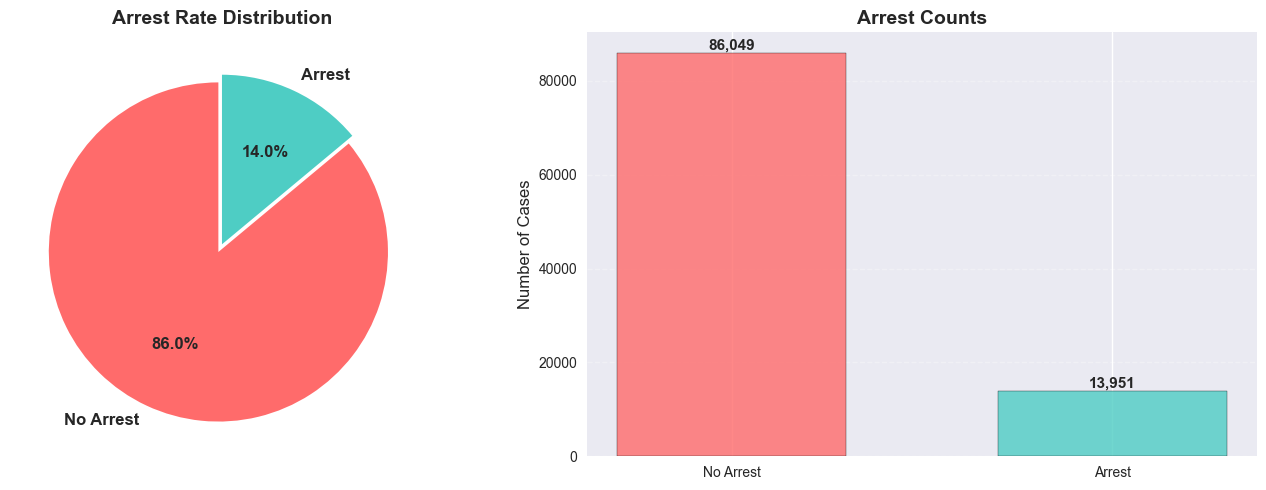


👮 ARREST STATISTICS:
  Overall Arrest Rate: 13.95%
  Arrests made: 13,951
  No arrests: 86,049


In [9]:
# Arrest rate analysis
if 'Arrest' in df.columns:
    arrest_counts = df['Arrest'].value_counts()
    arrest_rate = df['Arrest'].mean() * 100
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
    
    # Pie chart
    colors_pie = ['#ff6b6b', '#4ecdc4']
    explode = (0.05, 0)
    ax1.pie(arrest_counts, labels=['No Arrest', 'Arrest'], 
            autopct='%1.1f%%', colors=colors_pie, explode=explode,
            startangle=90, textprops={'fontsize': 12, 'fontweight': 'bold'})
    ax1.set_title('Arrest Rate Distribution', fontsize=14, fontweight='bold')
    
    # Bar chart
    ax2.bar(['No Arrest', 'Arrest'], arrest_counts.values, 
            color=colors_pie, alpha=0.8, edgecolor='black', width=0.6)
    ax2.set_ylabel('Number of Cases', fontsize=12)
    ax2.set_title('Arrest Counts', fontsize=14, fontweight='bold')
    ax2.grid(axis='y', alpha=0.3, linestyle='--')
    
    # Add value labels
    for i, v in enumerate(arrest_counts.values):
        ax2.text(i, v, f'{v:,}', ha='center', va='bottom', fontsize=11, fontweight='bold')
    
    plt.tight_layout()
    plt.show()
    
    print(f"\n👮 ARREST STATISTICS:")
    print(f"  Overall Arrest Rate: {arrest_rate:.2f}%")
    print(f"  Arrests made: {arrest_counts[True]:,}")
    print(f"  No arrests: {arrest_counts[False]:,}")

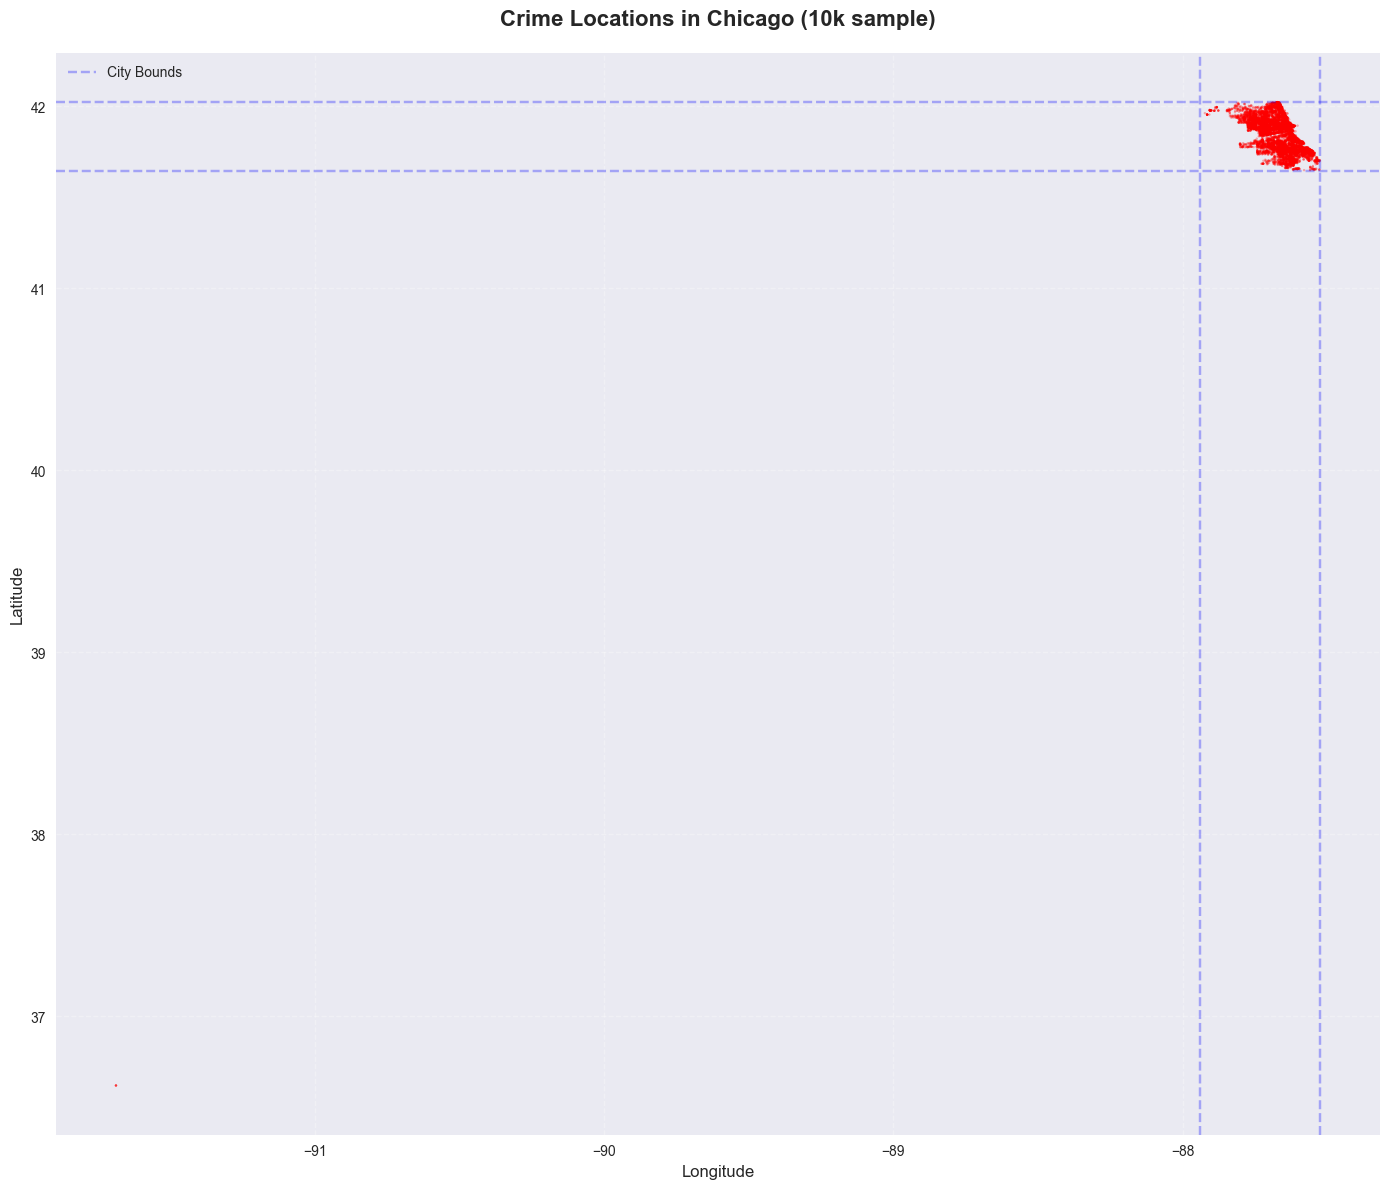


📍 SPATIAL COVERAGE:
  Valid coordinates: 90,888 (90.9%)
  Latitude range: 36.6194 to 42.0225
  Longitude range: -91.6866 to -87.5245


In [10]:
# Plot crime locations
valid_coords = df[['Latitude', 'Longitude']].dropna()
sample_coords = valid_coords.sample(min(10000, len(valid_coords)))

plt.figure(figsize=(14, 12))
plt.scatter(sample_coords['Longitude'], sample_coords['Latitude'], 
            alpha=0.3, s=3, c='red', edgecolors='none')

plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
plt.title('Crime Locations in Chicago (10k sample)', 
          fontsize=16, fontweight='bold', pad=20)
plt.grid(True, alpha=0.3, linestyle='--')

# Add city boundary
plt.axhline(y=41.644, color='blue', linestyle='--', alpha=0.3, label='City Bounds')
plt.axhline(y=42.023, color='blue', linestyle='--', alpha=0.3)
plt.axvline(x=-87.940, color='blue', linestyle='--', alpha=0.3)
plt.axvline(x=-87.524, color='blue', linestyle='--', alpha=0.3)
plt.legend()

plt.tight_layout()
plt.show()

print(f"\n📍 SPATIAL COVERAGE:")
print(f"  Valid coordinates: {len(valid_coords):,} ({len(valid_coords)/len(df)*100:.1f}%)")
print(f"  Latitude range: {valid_coords['Latitude'].min():.4f} to {valid_coords['Latitude'].max():.4f}")
print(f"  Longitude range: {valid_coords['Longitude'].min():.4f} to {valid_coords['Longitude'].max():.4f}")

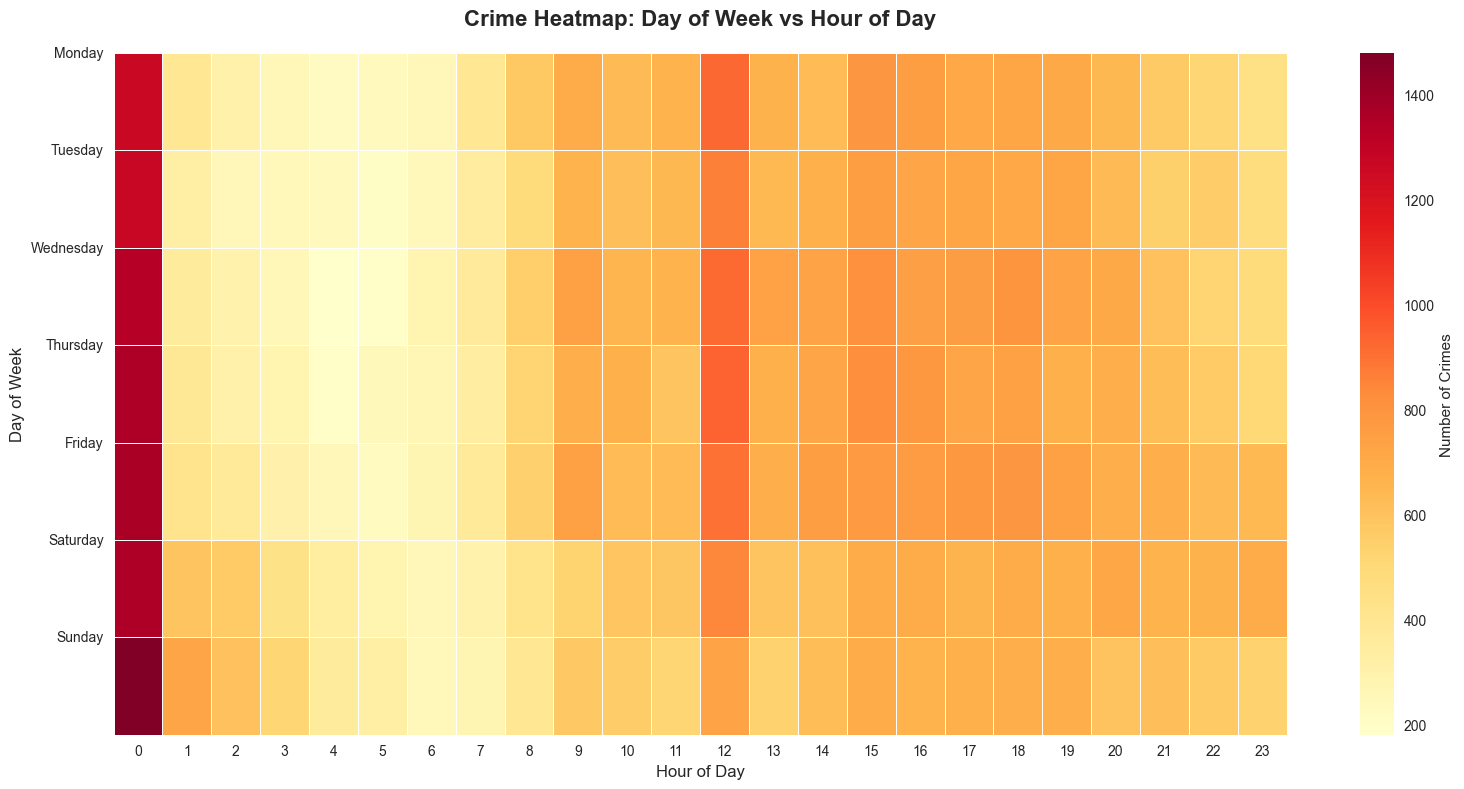


🔥 HOTTEST TIME PERIODS:
  Peak: Sunday at 0:00 (1,479 crimes)


In [11]:
# Create heatmap of crimes by hour and day of week
pivot_table = df.groupby(['DayOfWeek', 'Hour']).size().reset_index(name='Count')
heatmap_data = pivot_table.pivot(index='DayOfWeek', columns='Hour', values='Count')

plt.figure(figsize=(16, 8))
sns.heatmap(heatmap_data, cmap='YlOrRd', annot=False, fmt='d', 
            cbar_kws={'label': 'Number of Crimes'}, linewidths=0.5)

plt.yticks(range(7), days, rotation=0)
plt.title('Crime Heatmap: Day of Week vs Hour of Day', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Hour of Day', fontsize=12)
plt.ylabel('Day of Week', fontsize=12)
plt.tight_layout()
plt.show()

print("\n🔥 HOTTEST TIME PERIODS:")
max_idx = heatmap_data.stack().idxmax()
print(f"  Peak: {days[max_idx[0]]} at {max_idx[1]}:00 ({heatmap_data.loc[max_idx[0], max_idx[1]]:,.0f} crimes)")

In [12]:
print("="*70)
print("WEEK 1 DATA EXPLORATION - FINAL SUMMARY")
print("Team: Kiran Ghumare, Neethu Satravada, Sajitha Mathi")
print("="*70)

print(f"\n📊 DATASET OVERVIEW:")
print(f"  ✓ Records analyzed: {len(df):,}")
print(f"  ✓ Time period: {(df['Date'].max() - df['Date'].min()).days:,} days ({df['Year'].min()}-{df['Year'].max()})")
print(f"  ✓ Crime types: {df['Primary Type'].nunique()}")
print(f"  ✓ Unique locations: {df[['Latitude', 'Longitude']].drop_duplicates().shape[0]:,}")
print(f"  ✓ Data completeness: {(1 - df.isnull().sum().sum()/(df.shape[0]*df.shape[1]))*100:.1f}%")

print("\n🔍 KEY FINDINGS:")
print(f"  • Most common crime: {df['Primary Type'].mode()[0]}")
print(f"  • Peak crime hour: {df['Hour'].mode()[0]}:00")
print(f"  • Peak crime day: {df['DayName'].mode()[0]}")
print(f"  • Arrest rate: {df['Arrest'].mean()*100:.2f}%")
print(f"  • Spatial coverage: {len(valid_coords)/len(df)*100:.1f}%")

print("\n📈 TRENDS OBSERVED:")
print(f"  • Crimes peak during: {hourly.idxmax()}:00 hours")
print(f"  • Lowest crimes at: {hourly.idxmin()}:00 hours")
print(f"  • Weekend pattern: {'Higher' if day_counts[5:].mean() > day_counts[:5].mean() else 'Lower'} than weekdays")

print("\n" + "="*70)
print("✅ WEEK 1 DELIVERABLES COMPLETED")
print("="*70)
print("  ✓ Environment setup complete")
print("  ✓ Data downloaded (1.86 GB, ~100k records sample)")
print("  ✓ Data quality check completed")
print("  ✓ Exploratory analysis with 10+ visualizations")
print("  ✓ Key patterns identified")

print("\n" + "="*70)
print("📅 NEXT STEPS - WEEK 2")
print("="*70)
print("  1. Build ETL pipeline with PySpark")
print("  2. Process full dataset (not just sample)")
print("  3. Handle missing values systematically")
print("  4. Advanced feature engineering")
print("  5. Integrate weather and census data")
print("  6. Prepare data for modeling")

print("\n🎉 CONGRATULATIONS! Week 1 Complete!")
print("="*70)

WEEK 1 DATA EXPLORATION - FINAL SUMMARY
Team: Kiran Ghumare, Neethu Satravada, Sajitha Mathi

📊 DATASET OVERVIEW:
  ✓ Records analyzed: 100,000
  ✓ Time period: 8,855 days (2001-2025)
  ✓ Crime types: 33
  ✓ Unique locations: 59,539
  ✓ Data completeness: 98.1%

🔍 KEY FINDINGS:
  • Most common crime: THEFT
  • Peak crime hour: 0:00
  • Peak crime day: Friday
  • Arrest rate: 13.95%
  • Spatial coverage: 90.9%

📈 TRENDS OBSERVED:
  • Crimes peak during: 0:00 hours
  • Lowest crimes at: 5:00 hours
  • Weekend pattern: Higher than weekdays

✅ WEEK 1 DELIVERABLES COMPLETED
  ✓ Environment setup complete
  ✓ Data downloaded (1.86 GB, ~100k records sample)
  ✓ Data quality check completed
  ✓ Exploratory analysis with 10+ visualizations
  ✓ Key patterns identified

📅 NEXT STEPS - WEEK 2
  1. Build ETL pipeline with PySpark
  2. Process full dataset (not just sample)
  3. Handle missing values systematically
  4. Advanced feature engineering
  5. Integrate weather and census data
  6. Prepare

In [13]:
# %% [markdown]
# # Week 2 — ETL, Cleaning, Feature Engineering & EDA (Chicago Crime)
#
# **Course:** FA 25 6513-C Big Data  
# **Project:** Crime Pattern Prediction and Hotspot Analysis  
# **Team:** Neethu Satravada (ns6411), Kiran Ghumare (kg4021), Sajitha Mathi (sm12344)
#
# **This notebook covers:**
# - PySpark ETL pipeline (read → clean → feature engineer → write Parquet)
# - Optional joins (weather / census)
# - Exploratory Data Analysis (EDA) with plots
#
# ⚙️ Tip: Run this as a Notebook in VS Code.
# Each `# %%` cell runs separately; you can export later as `.ipynb`.


In [14]:

!pip install pyspark pyarrow  
from pyspark.sql import SparkSession, functions as F, types as T

app_name = "Week2_ETL_ChicagoCrime"

spark = (
    SparkSession.builder
    .appName(app_name)
    # Optional configuration tweaks:
    # .config("spark.sql.shuffle.partitions", "200")
    # .config("spark.driver.memory", "8g")
    # .config("spark.executor.memory", "8g")
    .getOrCreate()
)

spark


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 434.2/434.2 MB 6.9 MB/s  0:01:150:00:0100:02
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.2/34.2 MB 6.1 MB/s  0:00:05m0:00:0100:01
  Created wheel for pyspark: filename=pyspark-4.0.1-py2.py3-none-any.whl size=434813860 sha256=7a84b5bd28fcfe6b634805d523504cb77aec05978c40294d57bfba4627e65fde
  Stored in directory: /Users/neethusatravada/Library/Caches/pip/wheels/31/9f/68/f89fb34ccd886909be7d0e390eaaf97f21efdf540c0ee8dbcd
Successfully built pyspark
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3/3 [pyarrow]m2/3 [pyarrow]


Using Spark's default log4j profile: org/apache/spark/log4j2-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
25/11/05 15:27:48 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
